
### 동전던지기 게임
한 번 동전을 던져서 앞면이 나오면 2배를 돌려받고, 뒷면이 나오면 투자한 돈을 모두 잃는 게임이 있다고 가정해봅시다. 동전이 공평해서 앞면과 뒷면이 나올 확률이 각각 50%라고 가정합니다.

- 성공 확률 $ p = 0.5 $
- 실패 확률 $ q = 1 - p = 0.5 $
- 배당률 $ b = 1.2 $ (10,000원을 걸면 지면 -10,000원, 이기면 24,000원)


---



# 기대수익률 높으니 매회 올인?

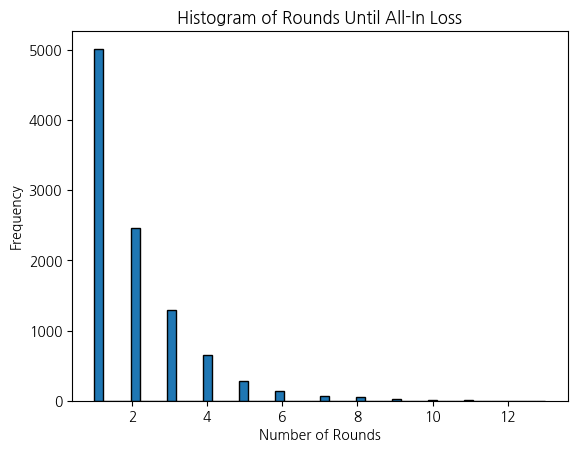

In [1]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import random

initial_amount = 10000
betting_amount = None
betting_rate = 1
p = 0.5
b = 1.2
rounds = 10000


# Modify the simulation function to track when all money is lost
def simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds):
    amount = initial_amount
    for i in range(rounds):   
        if betting_amount is None:       
            betting_amount_per_step = amount* betting_rate
        else:
            betting_amount_per_step = betting_amount    
        if amount <= 0:
            return i  # Return the round number when all money is lost
        if random.random() < p:  # Win case
            amount += betting_amount_per_step * b
        else:  # Lose case
            amount -= betting_amount_per_step
    return rounds  # If the player never loses all money, return total rounds

# Run the simulation multiple times and collect data
simulations = 10000
loss_rounds = []

for _ in range(simulations):
    round_lost = simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds)
    loss_rounds.append(round_lost)

# Plot the histogram
plt.hist(loss_rounds, bins=50, edgecolor='black')
plt.title("Histogram of Rounds Until All-In Loss")
plt.xlabel("Number of Rounds")
plt.ylabel("Frequency")
plt.show()

### ALL IN 1만회 평균 수익률: -100%

---

기대수익률


$
E = p \times (1 + b) + q \times (-1)
$

여기서:
- 성공 확률 $ p = 0.5 $
- 실패 확률 $ q = 0.5 $
- 배당률 $ b = 1.2 $

이 값을 대입하여 계산하면:

$
E = 0.5 \times (1 + 1.2) + 0.5 \times (-1)
$

$
E = 0.5 \times 2.2 + 0.5 \times (-1)
$

$
E = 1.1 - 0.5 = 0.6
$

따라서 기대수익률 $ E $는 **0.6** 또는 **60%**입니다.

---

## 매회 전체자금 80% 배팅?

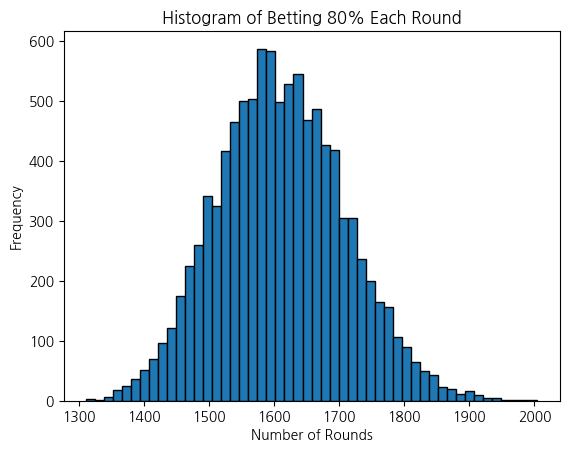

In [2]:
import matplotlib.pyplot as plt
import random

initial_amount = 10000
betting_amount = None
betting_rate = 0.8
p = 0.5
b = 1.2
rounds = 10000

# Run the simulation multiple times and collect data
simulations = 10000
loss_rounds = []

for _ in range(simulations):
    round_lost = simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds)
    loss_rounds.append(round_lost)

# Plot the histogram
plt.hist(loss_rounds, bins=50, edgecolor='black')
plt.title("Histogram of Betting 80% Each Round")
plt.xlabel("Number of Rounds")
plt.ylabel("Frequency")
plt.show()

### 매회 80%금액 배팅 1만회 평균수익률: -100%(평균 라운드 1600회)

---

## 매 라운드마다 50% 배팅하면? 동일전략으로 10명 시뮬레이션 잔고 분석

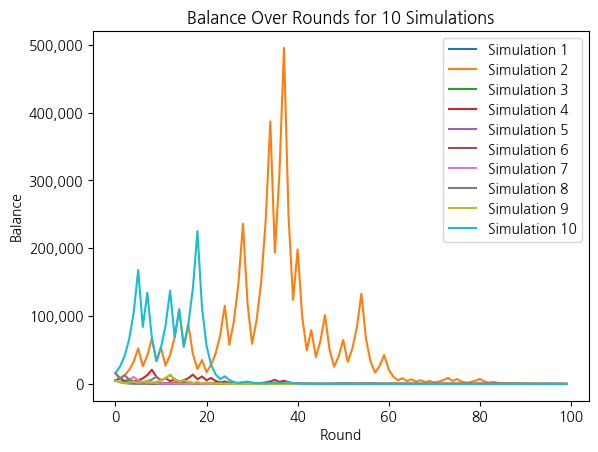

In [3]:
import matplotlib.pyplot as plt
import random

initial_amount = 10000
betting_amount = None
betting_rate = 0.5
p = 0.5
b = 1.2
rounds = 100


histories = []
# Modify the simulation function to track when all money is lost
def simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds):
    amount = initial_amount
    history = []
    for i in range(rounds):   
        if betting_amount is None:       
            betting_amount_per_step = amount* betting_rate
        else:
            betting_amount_per_step = betting_amount    
        if amount <= 0:
            return i  # Return the round number when all money is lost
        if random.random() < p:  # Win case
            amount += betting_amount_per_step * b
        else:  # Lose case
            amount -= betting_amount_per_step
        
        history.append(amount)
    return history  # If the player never loses all money, return total rounds

# Run the simulation multiple times and collect data
simulations = 10

for _ in range(simulations):
    histories.append( simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds))


# Plot the line graph for 10 simulations
for i, balance_history in enumerate(histories):
    plt.plot(balance_history, label=f'Simulation {i+1}')

# Add commas to the y-axis for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title("Balance Over Rounds for 10 Simulations")
plt.xlabel("Round")
plt.ylabel("Balance")
plt.legend()
plt.show()


## 매 라운드마다 1000원씩 배팅? (100라운드) * 10명 잔고분석

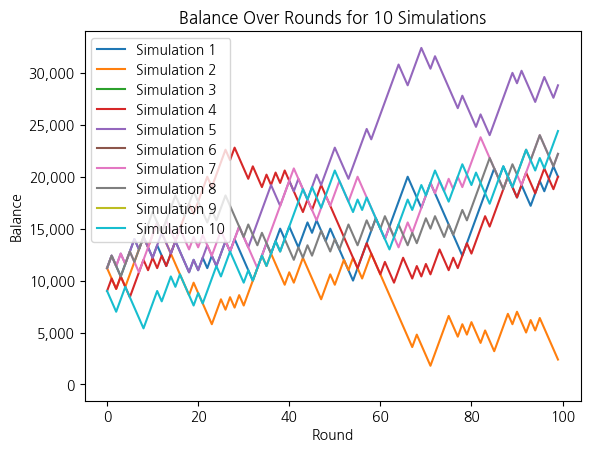

In [4]:
import matplotlib.pyplot as plt
import random

initial_amount = 10000
betting_amount = 1000
betting_rate = None
p = 0.5
b = 1.2
rounds = 100


histories = []

simulations = 10

for _ in range(simulations):
    histories.append( simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds))


# Plot the line graph for 10 simulations
for i, balance_history in enumerate(histories):
    plt.plot(balance_history, label=f'Simulation {i+1}')

# Add commas to the y-axis for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title("Balance Over Rounds for 10 Simulations")
plt.xlabel("Round")
plt.ylabel("Balance")
plt.legend()
plt.show()


### 올인 아무도 없이 그래도 꾸준히 수익, 1만회로 돌려보면 어떨까?

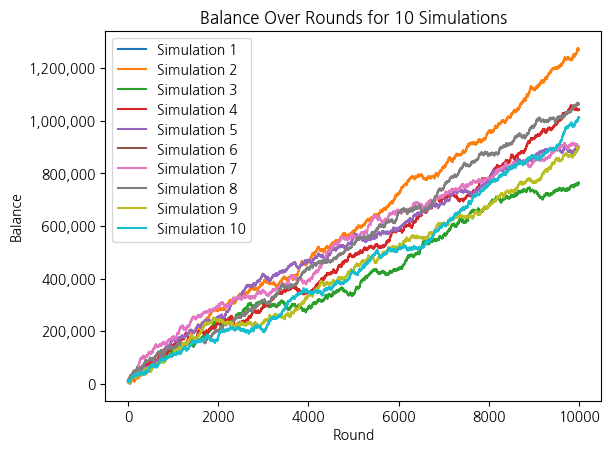

In [5]:
import matplotlib.pyplot as plt
import random

initial_amount = 10000
betting_amount = 1000
betting_rate = None
p = 0.5
b = 1.2
rounds = 10000


histories = []

simulations = 10

for _ in range(simulations):
    histories.append( simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds))


# Plot the line graph for 10 simulations
for i, balance_history in enumerate(histories):
    plt.plot(balance_history, label=f'Simulation {i+1}')

# Add commas to the y-axis for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title("Balance Over Rounds for 10 Simulations")
plt.xlabel("Round")
plt.ylabel("Balance")
plt.legend()
plt.show()


### 우상향 하긴 하는데 너무 느려...!

---

## 최적화된 배팅 방법?

### 켈리공식!


$ f^* = \frac{bp - q}{b} $

- $ f^* $: 총 자본에서 투자해야 할 비율
- $ b $: 배당률 
- $ p $: 성공 확률
- $ q $: 실패 확률 ($ 1 - p $)


### 문제 정리:
- 이겼을 때 1.2만원을 돌려받고, 즉 **이익**은 $ 1.2만원 - 1만원 = 0.2만원 (2,000원) $.
- 졌을 때는 투자한 1만원을 잃습니다.
- 성공 확률 $ p = 0.5 $
- 실패 확률 $ q = 1 - p = 0.5 $
- 배당률 $ b = 1.2 $ 


$
f^* = \frac{bp - q}{b}
$

여기서:
- $ p = 0.5 $
- $ q = 0.5 $
- $ b = 1.2 $

이 값을 대입하면:

$
f^* = \frac{1.2 \times 0.5 - 0.5}{1.2}
$

$
f^* = \frac{0.6 - 0.5}{1.2} = \frac{0.1}{1.2} \approx 0.0833
$

### 결론:
켈리 공식에 따르면, 이 게임에서 최적의 투자 비율 $ f^* $는 약 **8.33%**입니다. 다시 말해, 자본의 약 8.33%를 이 게임에 투자하는 것이 최적의 전략이라는 결론이 나옵니다.

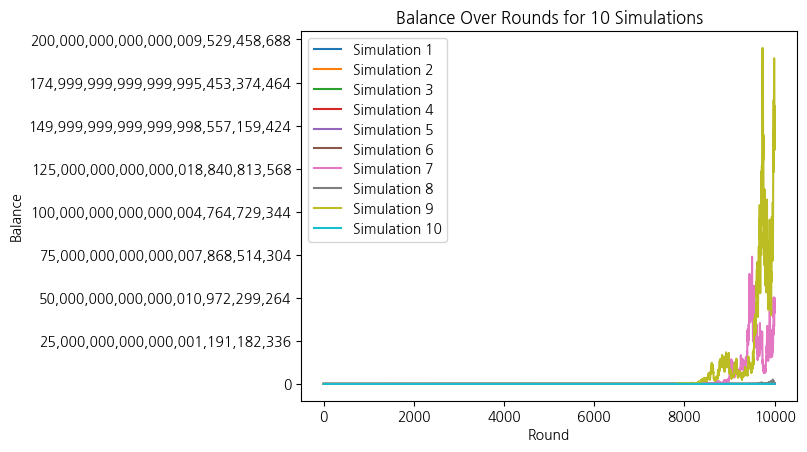

In [6]:
import matplotlib.pyplot as plt
import random

initial_amount = 10000
betting_amount = None
betting_rate = 0.0833
p = 0.5
b = 1.2
rounds = 10000


histories = []

simulations = 10

for _ in range(simulations):
    histories.append( simulate_game_with_tracking(initial_amount, betting_amount, betting_rate, p, b, rounds))


# Plot the line graph for 10 simulations
for i, balance_history in enumerate(histories):
    plt.plot(balance_history, label=f'Simulation {i+1}')

# Add commas to the y-axis for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title("Balance Over Rounds for 10 Simulations")
plt.xlabel("Round")
plt.ylabel("Balance")
plt.legend()
plt.show()


In [7]:
import datetime

In [8]:
datetime.time(8, 45)

datetime.time(8, 45)